<a href="https://colab.research.google.com/github/pi-mishra/Rossmann-Sales-Prediction-Regression-/blob/main/Rossmann_Sales_Prediction_(Piyush)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Sales Prediction : Predicting sales of a major store chain Rossmann


##### **Project Type**    - Regression
##### **Contribution**    - Individual


# Summary

This project involved merging two datasets into one dataframe called all_store, which had 1017209 rows and 18 columns. The dataframe consisted of int, object, and float datatypes, and object datatypes were later converted to int. There were no duplicate values, but six columns had null values that needed to be treated.

To better understand the data the year, month, and day from the "date" column were extracted and then dropped. The "Open" column was also dropped since no sales occurred when stores were closed. Furthermore, 49% of data was missing from columns "Promo2SinceWeek," "Promo2SinceYear," and "PromoInterval," so they were dropped. Considering date as categories we have filled ‘CompetitionOpenSinceMonth’ and 'CompetitionOpenSinceYear' with mode. Considering there is no competition or the competion is so far that there is no account of the data, so filling null values with 0.

The most common type of store was "a" with 551,627, followed by "d" with 312,912, "c" with 136,840, and "b" with 15,830. It was discovered that store type and sales were correlated, with more stores leading to more sales. Monday had the highest number of sales, followed by Tuesday, Friday, Wednesday, Thursday, Saturday, and Sunday. Similarly, average sales for different days of the week followed the same trend. Store B had higher average sales than other stores C, A, and D, respectively. Monthly sales over the year increased, with an increase in the number of stores leading to more customers' visits and higher sales. Sales data were right-skewed, and 17% of stores were affected by the closure of public schools. No promos were run on Saturday and Sunday, and sales increased when the promo was used.

It was observed that the "CompetitionDistance" column had a large positive skewness of 2.93, indicating a heavily skewed right-tailed distribution. On the other hand, "Sales" had a small positive skewness of 0.64, indicating a slightly skewed right-tailed distribution, while "Customers" had a moderate positive skewness of 1.60, indicating a skewed right-tailed distribution.

To remove outliers the IQR method was used and then one-hot encoding was performed. The data were then scaled using MinMaxScaler.

Conclusion was made that the decision tree and XG boost models outperformed linear, ridge, and lasso regression models in predicting sales of Rossman stores. The decision tree model achieved an R2 score of 0.973 and a low RMSE of 538, while the XG boost model achieved an R2 score of 0.926 and a relatively low RMSE of 849. In contrast, the linear, ridge, and lasso regression models achieved similar R2 scores of around 0.893, with higher RMSE values ranging from 1021 to 1022. The decision tree and XG boost models are more accurate and may be more robust to non-linear relationships in the data, making them the preferred models for predicting sales of Rossman stores.

# **GitHub Link -**

https://github.com/pi-mishra

# **Problem Description -**

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Table of content-**
1. Knowing Data
2. Understanding the variable
3. Data wrangling
4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables
5. Feature engineering
6. Pre processing
7. Model implimentation
8. Conclusion




# **1.** **Knowing the data**

In [ ]:
#importing packages


import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the datasets

r_stores = pd.read_csv('/content/drive/MyDrive/Rossmann Sales prediction - Piyush/Copy of Rossmann Stores Data.csv')

In [ ]:
stores= pd.read_csv('/content/drive/MyDrive/Rossmann Sales prediction - Piyush/Copy of store.csv')

In [ ]:
#first 5 rows of r_store data

r_stores.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#first 5 rows of store data

stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
#mearging the 2 data sets

all_store = pd.merge(r_stores, stores, on ='Store')

In [ ]:
#dataset rows and column count

all_store.shape

(1017209, 18)

In [ ]:
#first view of merged column

all_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [ ]:
#getting the info of dataframe

all_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
#checking for duplicate value

all_store.duplicated().sum()

0

In [ ]:
#getting the count of null values

all_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [ ]:
#getting count of unique value

all_store.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

Observation- 
* The 2 datasets are merged into 1 dataframe i.e. all_store consisting of 1017209 rows and 18 columns.

* The dataframe consist of int, object and float datatypes. Object data type will be changed to int later.

* There are 0 dublicate value.

* There are 6 columns (CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval) that has null values it needs to be treated.

# ***2. Understanding Your Variables***

In [ ]:
#getting the name of columns

all_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
#rounding off the describe function 

round(all_store.describe(),1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1014567.0,693861.0,693861.0,1017209.0,509178.0,509178.0
mean,558.4,4.0,5773.8,633.1,0.8,0.4,0.2,5430.1,7.2,2008.7,0.5,23.3,2011.8
std,321.9,2.0,3849.9,464.4,0.4,0.5,0.4,7715.3,3.2,6.0,0.5,14.1,1.7
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,1900.0,0.0,1.0,2009.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0,710.0,4.0,2006.0,0.0,13.0,2011.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0,2330.0,8.0,2010.0,1.0,22.0,2012.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0,6890.0,10.0,2013.0,1.0,37.0,2013.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0,75860.0,12.0,2015.0,1.0,50.0,2015.0


In [ ]:
#using for loop to iterate over categorical columns

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

for col in categorical_variables:
  print(f'Unique values for {col}:{all_store[col].unique()}')

Unique values for DayOfWeek:[5 4 3 2 1 7 6]
Unique values for Open:[1 0]
Unique values for Promo:[1 0]
Unique values for StateHoliday:['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday:[1 0]
Unique values for StoreType:['c' 'a' 'd' 'b']
Unique values for Assortment:['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth:[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear:[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2:[0 1]
Unique values for Promo2SinceWeek:[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear:[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval:[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
#getting count of unique value

all_store.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

Obsevation-
In the above section we found out the name of all the columns and getting the unique values in each column. The .describe function helped us to find out the mean, standard deviation and percentiles of the numerical data available.

# 3. ***Data Wrangling***

In [ ]:
#converting date coloumn to datetime to extract year, month and day
all_store['Date']= pd.to_datetime(all_store['Date'])

In [ ]:
all_store['year'] = pd.DatetimeIndex(all_store['Date']).year

all_store['month'] = pd.DatetimeIndex(all_store['Date']).month

all_store['day'] = pd.DatetimeIndex(all_store['Date']).day

In [ ]:
#checking for the sales if the stores is closed
all_store[(all_store['Open'] == 0)]['Sales'].sum()

0

In [ ]:
#dropping date coloumn as we have extracted year , month and day
all_store.drop(['Date'], axis=1, inplace = True)


#dropping open column as if the store is closed it will not genrate sales
all_store.drop(['Open'], axis=1, inplace = True)

In [ ]:
all_store.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Sales                        0.000000
Customers                    0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
year                         0.000000
month                        0.000000
day                          0.000000
dtype: float64

In [ ]:
#dropping promo2sinceweek , promo2sinceyear, promointerval as there are 49% data missing

all_store1 = all_store.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)

In [ ]:
all_store1.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Sales                        0.000000
Customers                    0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
year                         0.000000
month                        0.000000
day                          0.000000
dtype: float64

In [ ]:
all_store1.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
mode = all_store1['CompetitionOpenSinceMonth'].mode()[0]
mode2 = all_store1['CompetitionOpenSinceYear'].mode()[0]

print('Month:', mode)
print('Year:', mode2)

Month: 9.0
Year: 2013.0


In [ ]:
#considering date as catogaries and filling them with mode 

all_store1['CompetitionOpenSinceMonth'] = all_store1['CompetitionOpenSinceMonth'].fillna(9.0)

In [ ]:
all_store1['CompetitionOpenSinceYear'] = all_store1['CompetitionOpenSinceYear'].fillna(2013.0)

In [ ]:
#considering there is no competion or the competition is so far that there is no account of the data, so filling null values with 0
all_store1['CompetitionDistance'] = all_store1['CompetitionDistance'].fillna(0)

Observation-
Year , month and day was extracted from the ‘date’ column and then it was dropped.
There were 0 sales when the stores were closed so we are dropping the ‘Open’ column as it will not provide any useful information for the analysis. 49% of data was missing from 'Promo2SinceWeek','Promo2SinceYear','PromoInterval' so we dropped the column. Considering date as categories we have filled ‘CompetitionOpenSinceMonth’ and 'CompetitionOpenSinceYear' with mode. Considering there is no competition or the competion is so far that there is no account of the data, so filling null values with 0.


# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

  StoreType  counts
0         a  551627
1         b   15830
2         c  136840
3         d  312912


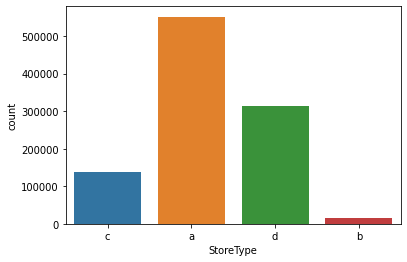

In [ ]:
#1. Visual representation of count of store
sns.countplot(all_store1['StoreType'])

store_count = all_store1.groupby('StoreType').size().reset_index(name='counts')
print(store_count)

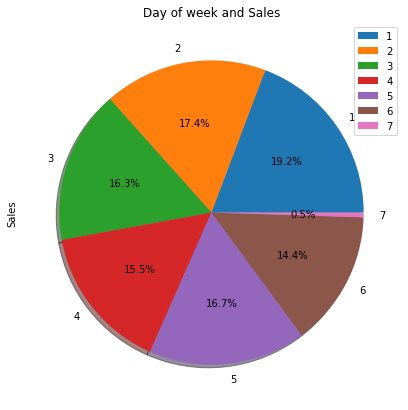

,DayOfWeek,Sales day of week
0,1,1130203012
1,2,1020411930
2,3,954962863
3,4,911177709
4,5,980555941
5,6,846317735
6,7,29551433


In [ ]:
#2. Day of week and their sales percentage
all_store.groupby("DayOfWeek")["Sales"].sum().plot.pie(title='Day of week and Sales', legend=True, autopct='%1.1f%%', shadow=True, figsize=(7, 7))
plt.show()

all_store.groupby("DayOfWeek")["Sales"].sum().reset_index(name='Sales day of week')

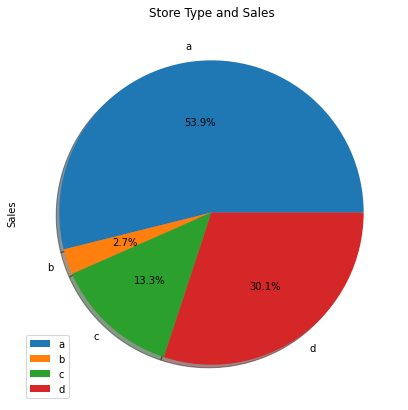

In [ ]:
#3. store type and their sales percentage
all_store.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, figsize=(7, 7))
plt.show()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

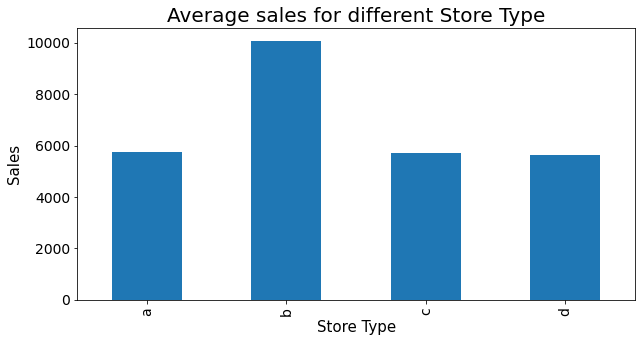

In [ ]:
#4. Average sales done by differnt store
#Create the figure object 
ax = all_store.groupby(['StoreType'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales for different Store Type", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Store Type", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

all_store.groupby(['StoreType'])['Sales'].mean()

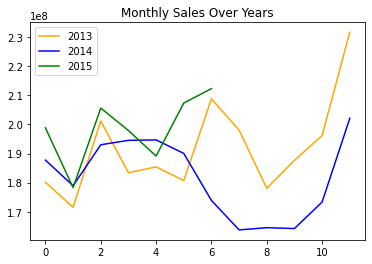

In [ ]:
#5. sales over the years
sales_2013_df = all_store1[all_store['year']== 2013]
sales_2014_df = all_store1[all_store['year']== 2014]
sales_2015_df = all_store1[all_store['year']== 2015]

#monthly sales
sales_2013 = sales_2013_df.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_2014_df.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_2015_df.groupby('month')['Sales'].sum().reset_index()

plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

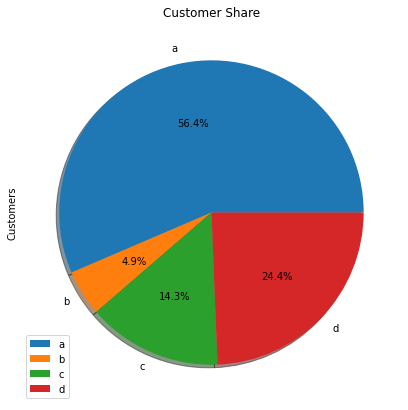

In [ ]:
#6. Customers share percentage with respect to store
all_store.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True, figsize=(7, 7))
plt.show()

Text(0, 0.5, 'Sales')

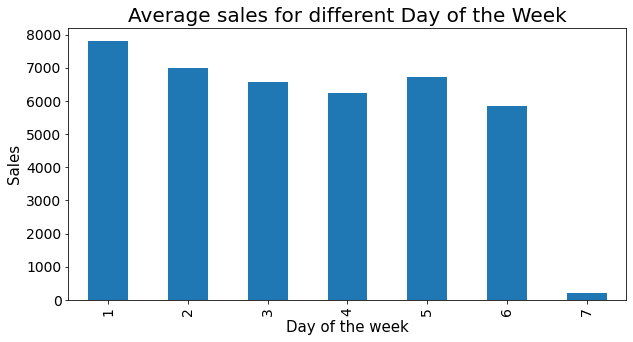

In [ ]:
#7. Average sales for different days of the week

# Create the figure object 
ax = all_store.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales for different Day of the Week", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Day of the week", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

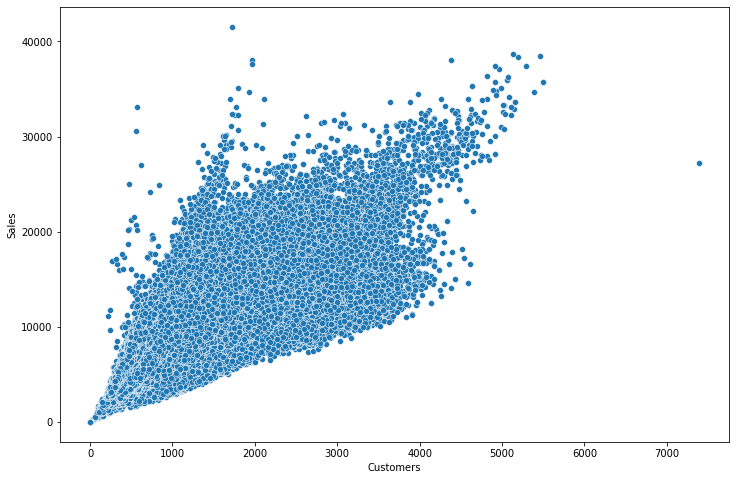

In [ ]:
#8. sales with respect to customers

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x=all_store['Customers'], y=all_store['Sales'])

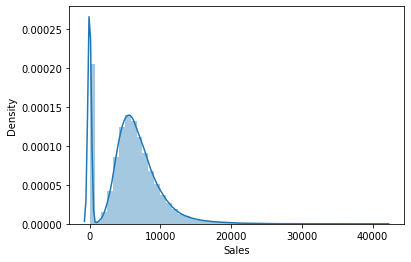

In [ ]:
#9.desinty plot of sales
sns.distplot(all_store['Sales'])

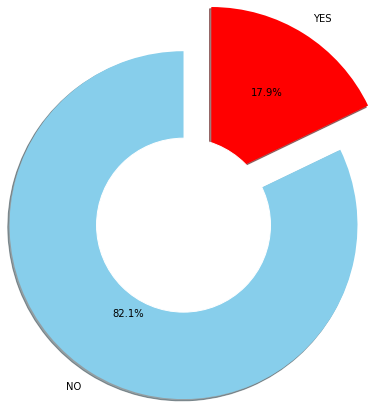

In [ ]:
#10. graphical representation of School holiday 
data = all_store['SchoolHoliday'].value_counts()
explode = (0, 0.6)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

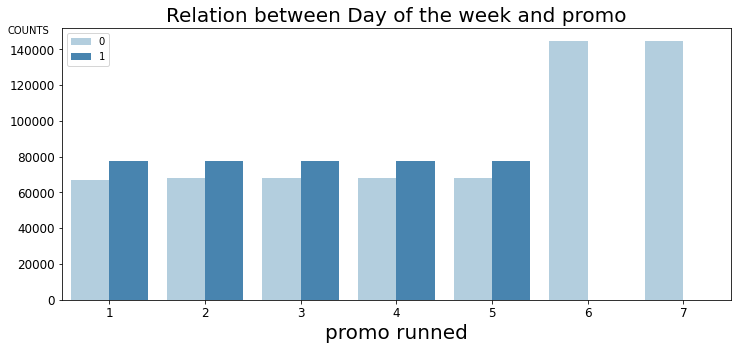

In [ ]:
#11. Relation between Day of the week and promo

fig, axz = plt.subplots(figsize=(12,5))

axz = sns.countplot(x='DayOfWeek', hue='Promo', data=all_store, palette='Blues')

axz.set_title('Relation between Day of the week and promo', fontsize=20)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('promo runned', size=20)
axz.yaxis.set_label_coords(-0.05, 0.97)  # (x, y)
axz.legend(loc=0,fontsize=10);

axz.tick_params(labelsize=12)

Text(0, 0.5, 'Sales')

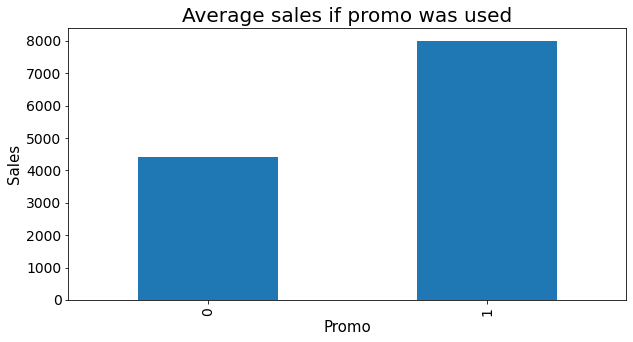

In [ ]:
#12.Average sales if promo was used

ax = all_store.groupby(['Promo'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales if promo was used", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Promo", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

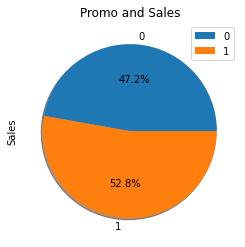

In [ ]:
#13. Sales done when promo was runned

all_store.groupby("Promo")["Sales"].sum().plot.pie(title='Promo and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

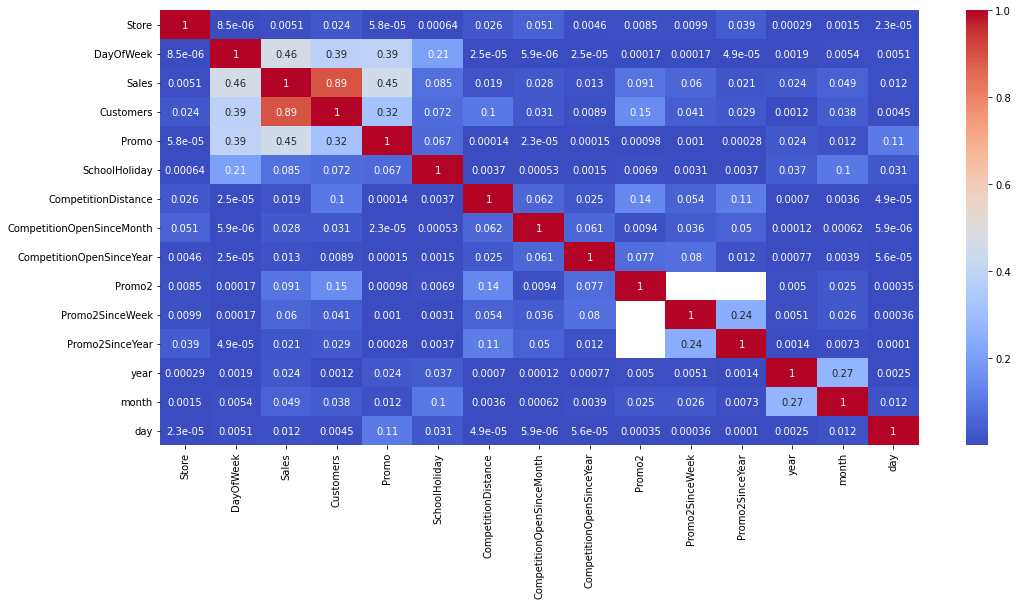

In [ ]:
#14. corelation heatmap

plt.figure(figsize=(17,8))
correlation=all_store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Observation-
The most common type of store is 'a' with 551627, followed by 'd' with 312912, 'c' with 136840, and the least common is 'b' with 15830. Storetype and sales are correlated, more the stores more will be the sales.
Maximum number of sales was done on monday followed by tuesday, friday, wednesday,thursday, saturday and sunday. Same result was produced for average sales for different days of week.
Average sales of store b were greater than other stores c,a,d respectively.
Monthly sales over the year have increased.
Increase in the number of stores will result in the increase of customers' visits.
Increase in customers leads to increase in sales.
Sales consist of right skewed data.
17% of stores were affected with the closure of public schools.
There were no promo runned on Saturday and sunday.
The sales increased when the promo was used.





## ***6. Feature Engineering & Data Pre-processing***

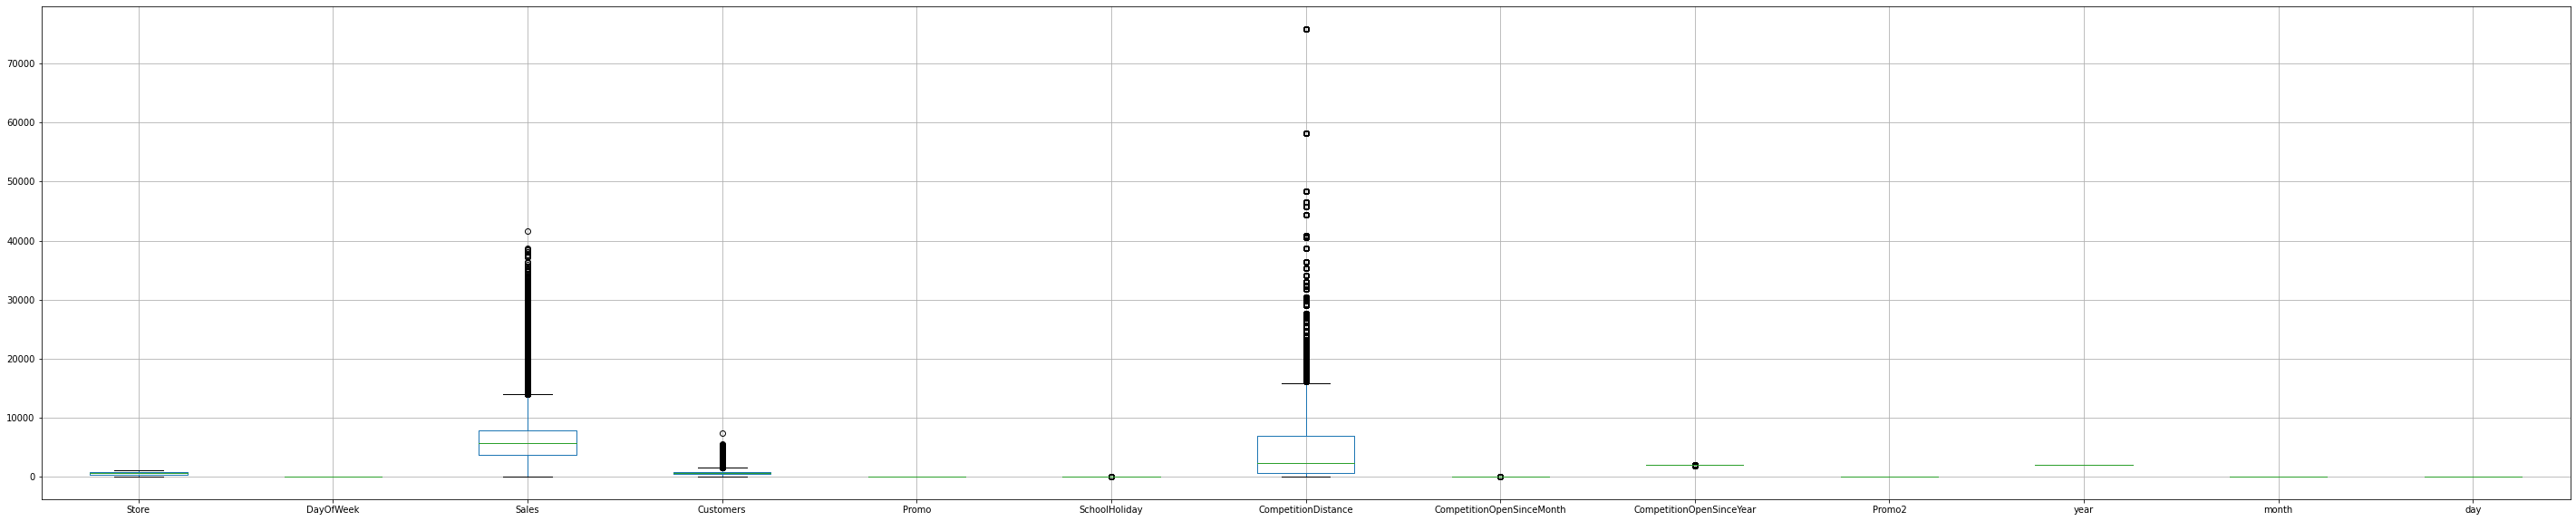

In [ ]:
#checking for outliers in boxplot

all_store1.boxplot(figsize = (50,10))

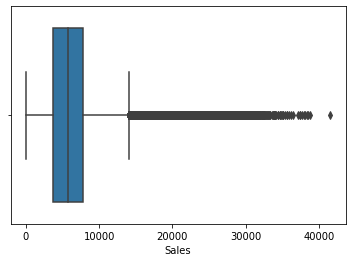

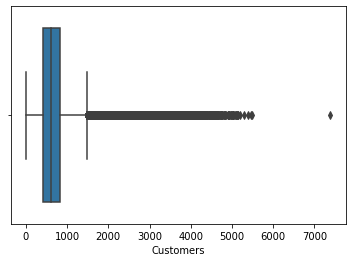

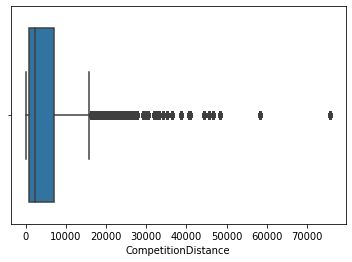

In [ ]:
#creating boxplot for the columns that have outliers

sns.boxplot(x=all_store1["Sales"])
plt.show()

sns.boxplot(x=all_store1["Customers"])
plt.show()

sns.boxplot(x=all_store1["CompetitionDistance"])
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


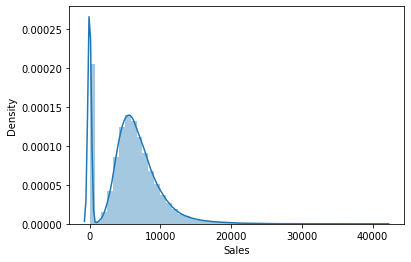

In [ ]:
#checking the skewness of data using distribution plot

print(sns.distplot(all_store['Sales']))

AxesSubplot(0.125,0.125;0.775x0.755)


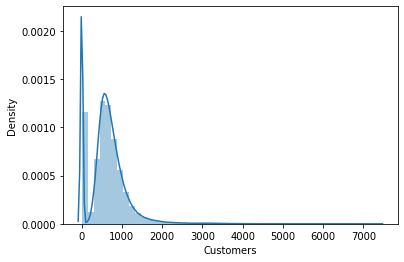

In [ ]:
#checking the skewness of data using distribution plot

print(sns.distplot(all_store['Customers']))

AxesSubplot(0.125,0.125;0.775x0.755)


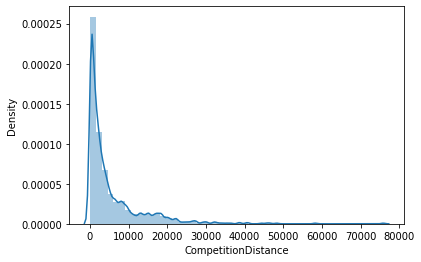

In [ ]:
#checking the skewness of data using distribution plot

print(sns.distplot(all_store['CompetitionDistance']))

In [ ]:
#cheking for the cloumn percentile to understand the data to implement Interquartile Range

round(all_store.Customers.describe(percentiles=[.025, .99]),1)

count    1017209.0
mean         633.1
std          464.4
min            0.0
2.5%           0.0
50%          609.0
99%         2267.0
max         7388.0
Name: Customers, dtype: float64

In [ ]:
round(all_store.Sales.describe(percentiles=[.025, .95]),1)

count    1017209.0
mean        5773.8
std         3849.9
min            0.0
2.5%           0.0
50%         5744.0
95%        12137.0
max        41551.0
Name: Sales, dtype: float64

In [ ]:
round(all_store.CompetitionDistance.describe(percentiles=[.025, .95]),1)

count    1014567.0
mean        5430.1
std         7715.3
min           20.0
2.5%          80.0
50%         2330.0
95%        20390.0
max        75860.0
Name: CompetitionDistance, dtype: float64

In [ ]:
print(all_store1['CompetitionDistance'].skew())
print(all_store1['Sales'].skew())
print(all_store1['Customers'].skew())

2.9312750695643035
0.6414596158103798
1.598650289950892


In [ ]:
#The skewness of 'CompetitionDistance' is 2.93, which is a large positive value, indicating that the distribution is heavily skewed to the right (i.e. the tail on the right side is longer than the left).
#The skewness of 'Sales' is 0.64, which is a relatively small positive value, indicating that the distribution is slightly skewed to the right.
#The skewness of 'Customers' is 1.60, which is a moderate positive value, indicating that the distribution is skewed to the right.

In [ ]:
#removing outliers using IQR method

percentile25_cd = all_store1['CompetitionDistance'].quantile(0.25)
percentile75_cd = all_store1['CompetitionDistance'].quantile(0.75)

percentile25_s = all_store1['Sales'].quantile(0.25)
percentile75_s = all_store1['Sales'].quantile(0.75)

percentile25_c = all_store1['Customers'].quantile(0.25)
percentile75_c = all_store1['Customers'].quantile(0.75)

In [ ]:
iqr_cd = percentile75_cd - percentile25_cd
iqr_s = percentile75_s - percentile25_s
iqr_c = percentile75_c - percentile25_c

In [ ]:
print(iqr_cd)
print(iqr_s)
print(iqr_c)

6180.0
4129.0
432.0


In [ ]:
upper_limit_cd = percentile75_cd + 1.5 * iqr_cd
lower_limit_cd = percentile25_cd - 1.5 * iqr_cd

upper_limit_s = percentile75_s + 1.5 * iqr_s
lower_limit_s = percentile25_s - 1.5 * iqr_s

upper_limit_c = percentile75_c + 1.5 * iqr_c
lower_limit_c = percentile25_c - 1.5 * iqr_c

print("Upper limit of competition distance=", upper_limit_cd)
print("Lower limit of competition distance=", lower_limit_cd)

print("Upper limit of sales=", upper_limit_s)
print("Lower limit of sales=", lower_limit_s)

print("Upper limit of Customers=", upper_limit_c)
print("Lower limit of Customers=", lower_limit_c)

Upper limit of competition distance= 16150.0
Lower limit of competition distance= -8570.0
Upper limit of sales= 14049.5
Lower limit of sales= -2466.5
Upper limit of Customers= 1485.0
Lower limit of Customers= -243.0


In [ ]:
all_store2 =all_store1[ (all_store1['CompetitionDistance'] < upper_limit_cd) & (all_store1['Sales'] < upper_limit_s ) & (all_store1['Customers'] < upper_limit_c )]

In [ ]:
all_store2.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,day
0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,31
1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,30
2,1,3,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,29
3,1,2,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,28
4,1,1,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,27


In [ ]:
#one- hot encoding of object datatype 

df = pd.get_dummies(all_store2, columns= ['StoreType','Assortment','StateHoliday'],drop_first = True)

In [ ]:
#checking if the dummies were created

df.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Promo                          int64
SchoolHoliday                  int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
year                           int64
month                          int64
day                            int64
StoreType_b                    uint8
StoreType_c                    uint8
StoreType_d                    uint8
Assortment_b                   uint8
Assortment_c                   uint8
StateHoliday_0                 uint8
StateHoliday_a                 uint8
StateHoliday_b                 uint8
StateHoliday_c                 uint8
dtype: object

In [ ]:
#defining x and y axis

x= df.drop(['Sales'],axis=1).values
y= df['Sales'].values

In [ ]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.20, random_state=10)

In [ ]:
#scaling of data

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Liner Regression

In [ ]:
#applying LinerRegression and fitting the model

reg = LinearRegression()
reg.fit(x_train,y_train)

#predicting the model

y_pred_lr = reg.predict(x_test)

In [ ]:
x_test.shape

(174889, 21)

In [ ]:
#Regression metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

r2_score_lr= r2_score(y_pred_lr,y_test)
print("r2_score:",r2_score_lr)

#1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
adjusted_r2_score_lr = 1-((1-r2_score_lr)*(174889-1)/(174889-1-21))
print("adjusted_r2_score:",adjusted_r2_score_lr)

print("MAE:", mean_absolute_error(y_test,y_pred_lr))

print("MSE:", mean_squared_error(y_test,y_pred_lr))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

r2_score: 0.8926591663096859
adjusted_r2_score: 0.8926462756127134
MAE: 779.9834949728931
MSE: 1042672.1649746533
RMSE: 1021.1131989033602


## Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(random_state=10)

ridge.fit(x_train,y_train)

y_pred_r = ridge.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score_r= r2_score(y_pred_r,y_test)
print("r2_score:",r2_score_r)

adjusted_r2_score_r = 1-((1-r2_score_r)*(174889-1)/(174889-1-21))
print("adjusted_r2_score:",adjusted_r2_score_r)

print("MAE:", mean_absolute_error(y_test,y_pred_r))

print("MSE:", mean_squared_error(y_test,y_pred_r))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_r)))

r2_score: 0.8926540316503038
adjusted_r2_score: 0.8926411403367035
MAE: 779.9792247581598
MSE: 1042671.9276531385
RMSE: 1021.113082696103


## Lasso

In [ ]:
lass = Lasso()

lass.fit(x_train,y_train)

y_pred_l = lass.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

r2_score_l= r2_score(y_pred_l,y_test)
print("r2_score:",r2_score_l)

#1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
adjusted_r2_score = 1-((1-r2_score_l)*(174889-1)/(174889-1-21))
print("adjusted_r2_score:",adjusted_r2_score)

print("MAE:", mean_absolute_error(y_test,y_pred_l))

print("MSE:", mean_squared_error(y_test,y_pred_l))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_l)))

r2_score: 0.892028176673246
adjusted_r2_score: 0.892015210199927
MAE: 779.4159311937761
MSE: 1043732.3761471782
RMSE: 1021.6322117803345


## Descision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
des_regressor = DecisionTreeRegressor()

In [ ]:
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_des = des_regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score_d= r2_score(y_pred_des,y_test)
print("r2_score:",r2_score_d)

adjusted_r2_score = 1-((1-r2_score_d)*(174889-1)/(174889-1-21))
print("adjusted_r2_score:",adjusted_r2_score)

print("MAE:", mean_absolute_error(y_test,y_pred_des))

print("MSE:", mean_squared_error(y_test,y_pred_des))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_des)))

r2_score: 0.9729676879031143
adjusted_r2_score: 0.9729644415584406
MAE: 345.97532720754305
MSE: 290487.49351302825
RMSE: 538.968917019366


## XgBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
xg_reg.fit(x_train,y_train)

[12:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred_xg = xg_reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score= r2_score(y_pred_xg,y_test)
print("r2_score:",r2_score)

adjusted_r2_score = 1-((1-r2_score)*(305163-1)/(305163-1-27))
print("adjusted_r2_score:",adjusted_r2_score)

print("MAE:", mean_absolute_error(y_test,y_pred_xg))

print("MSE:", mean_squared_error(y_test,y_pred_xg))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_xg)))

r2_score: 0.9259183886972286
adjusted_r2_score: 0.9259118335544061
MAE: 614.0873990724393
MSE: 721637.8388344334
RMSE: 849.4926949859154


# Conclusion


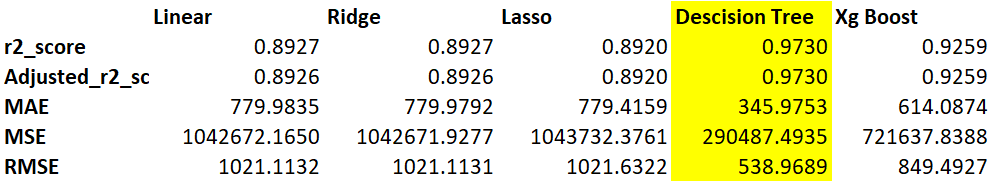

Based on the regression models evaluated, it is concluded that the decision tree and XG boost models outperformed the linear, ridge, and lasso regression models in predicting the sales of Rossman stores. The decision tree model achieved an R2 score of 0.973 and a low RMSE of 538, while the XG boost model achieved an R2 score of 0.926 and a relatively low RMSE of 849.

In contrast, the linear, ridge, and lasso regression models achieved similar R2 scores of around 0.893, with higher RMSE values ranging from 1021 to 1022. Although these models are less complex than the decision tree and XG boost models, they may not capture the non-linear relationships between the predictor variables and the response variable, leading to higher prediction errors.

Overall, the decision tree and XG boost models can be recommended for predicting the sales of Rossman stores, as they both offer a high level of accuracy and may be more robust to non-linear relationships in the data. 